In [ ]:
pip install langid

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import re
import numpy as np
from collections import Counter
import langid
import seaborn as sns
import datetime
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import re
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence,text
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation,Flatten
from keras.layers import  Embedding, LSTM,Bidirectional,SimpleRNN
from keras import metrics, regularizers
from keras.optimizers import RMSprop
from sklearn.utils import shuffle
import os
import pandas as pd
import numpy as np

#for NLP text processing and formatting

import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


# For word lemmitization
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

# for word Stemming
from nltk.stem.porter import PorterStemmer

# for Machine Learning process

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import nltk
nltk.download('stopwords')
# Global Parameters
stop_words = set(stopwords.words('english'))
import nltk
nltk.download('punkt')
import nltk
nltk.download('omw-1.4')
plt.style.use('ggplot')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
df = pd.read_csv("tweets.csv")

In [ ]:
df.head()

,name,username,description,location,followers,numberstatuses,time,tweets
0,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:07,ENGLISH TRANSLATION: 'A MESSAGE TO THE TRUTHFU...
1,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:27,ENGLISH TRANSLATION: SHEIKH FATIH AL JAWLANI '...
2,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:29,ENGLISH TRANSLATION: FIRST AUDIO MEETING WITH ...
3,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:37,ENGLISH TRANSLATION: SHEIKH NASIR AL WUHAYSHI ...
4,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:45,ENGLISH TRANSLATION: AQAP: 'RESPONSE TO SHEIKH...


In [ ]:
print("Unique tweets: {}".format(len(df['tweets'].unique())))
print("All tweets: {}".format(len(df['tweets'])))

Unique tweets: 17410
All tweets: 17410


In [ ]:
retweets = []
actual_tweets = []
for user, tweet in zip(df['username'], df['tweets']):
    match = re.search(r'^\bRT\b', tweet)
    if match == None:
        actual_tweets.append([user,tweet])
    else:
        retweets.append([user,tweet])   

actual_tweets = np.array(actual_tweets)
retweets = np.array(retweets)


([<matplotlib.patches.Wedge at 0x7f9841bf0490>,
 [Text(-0.5460990514976994, 0.9548695334721458, 'Actual Tweets'),
  Text(0.5460990514976993, -0.9548695334721458, 'Retweets')])

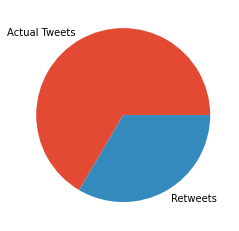

In [ ]:
label=['Actual Tweets', 'Retweets']
plt.pie( [len(actual_tweets[:,1]), len(retweets[:,1])],labels = label)


Text(0.5, 1.0, 'mentioned user names')

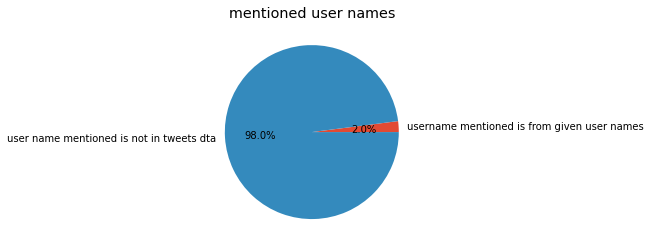

In [ ]:
in_set = []
not_in_set = []
for record in actual_tweets:
    match = re.findall(r'@\w*', record[1])
    if match != []:
        for name in match:
            if (name[1:] in df['username'].unique()) and (record[0] != name[1:]):
                in_set.append([record[0], name[1:]])
            elif record[0] != name[1:]:
                not_in_set.append([record[0], name[1:]])

in_set = np.array(in_set)
not_in_set = np.array(not_in_set)


label=['username mentioned is from given user names ','user name mentioned is not in tweets dta']
plt.pie([len(np.unique(in_set[:,1])), len(np.unique(not_in_set[:,1]))],labels=label,autopct='%1.1f%%')

plt.title('mentioned user names')



Text(0.5, 1.0, 'mentioned by other users from given dataset')

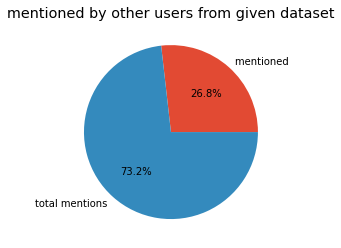

In [ ]:

label=['mentioned ','total mentions']
plt.pie([len(np.unique(in_set[:,1])), len(df['username'].unique())],labels=label,autopct='%1.1f%%')

plt.title('mentioned by other users from given dataset')

In [ ]:
sender_count = Counter(in_set[:,0])
receiver_count = Counter(in_set[:,1])
top_5_senders = sender_count.most_common(5)
top_5_receivers = receiver_count.most_common(5)

print(top_5_senders)
print(top_5_receivers)

[('MaghrabiArabi', 49), ('WarReporter1', 30), ('AsimAbuMerjem', 27), ('Uncle_SamCoco', 27), ('moustiklash', 20)]
[('RamiAlLolah', 53), ('Nidalgazaui', 34), ('MilkSheikh2', 26), ('WarReporter1', 15), ('_IshfaqAhmad', 15)]


In [ ]:
for name, _ in top_5_receivers:
    print("Username: {} - {}\n".format(name,
            df[df['username'] == name]['description'].dropna().unique()[0]))

Username: RamiAlLolah - Real-Time News, Exclusives, Intelligence & Classified Information/Reports from the ME. Forecasted many Israeli strikes in Syria/Lebanon. Graphic content.

Username: Nidalgazaui - 17yr. old Freedom Activist
/Correspondence of NGNA /Terror Expert/Middle East Expert. Daily News about Syria/Iraq/Yemen/Russia/Middle East

Username: MilkSheikh2 - Muslim, Iraqi, Banu Zubid, Qahtani, Chef, Engineer, Remaining until the best of them, fights al-Dajjal, Translate Old stuff mostly

Username: WarReporter1 - Reporting on conflicts in the MENA and Asia regions.

Username: _IshfaqAhmad - Medico at GMC Srinagar • Pro-Khilafah • Anti-Democratic • Anti-Nationalistic • Anti-Rafidah • Innocent Bystander of the Conflict in Middle East • Cricketist •



en    14556
ar      742
fr      610
ms      198
id      182
Name: language, dtype: int64


<AxesSubplot:title={'center':'Top 10 most common languages'}, ylabel='language'>

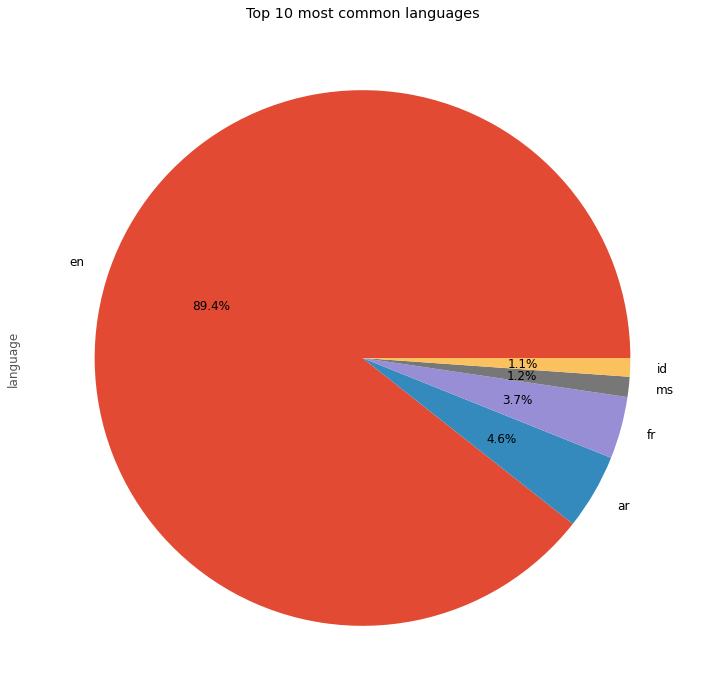

In [ ]:
predicted_languages = [langid.classify(tweet) for tweet in df['tweets']]

lang_df = pd.DataFrame(predicted_languages, columns=['language','value'])

# show the top ten languages & their counts
print(lang_df['language'].value_counts().head(5))

# plot the counts for the top ten most commonly used languages
colors=sns.color_palette('hls', 5) 
pd.Series(lang_df['language']).value_counts().head(5).plot(kind = "pie",
                                                        figsize=(12,14),
                                                        fontsize=12,autopct='%1.1f%%',
                                                        title = "Top 10 most common languages")

In [ ]:
df = pd.read_csv('tweets.csv', parse_dates=['time'], infer_datetime_format=True)
def tsimple(x):
    return datetime.datetime(x.year, x.month, x.day)

df['time'] = df.time.apply(tsimple)

<AxesSubplot:title={'center':'Top 20 Twitter Handles'}>

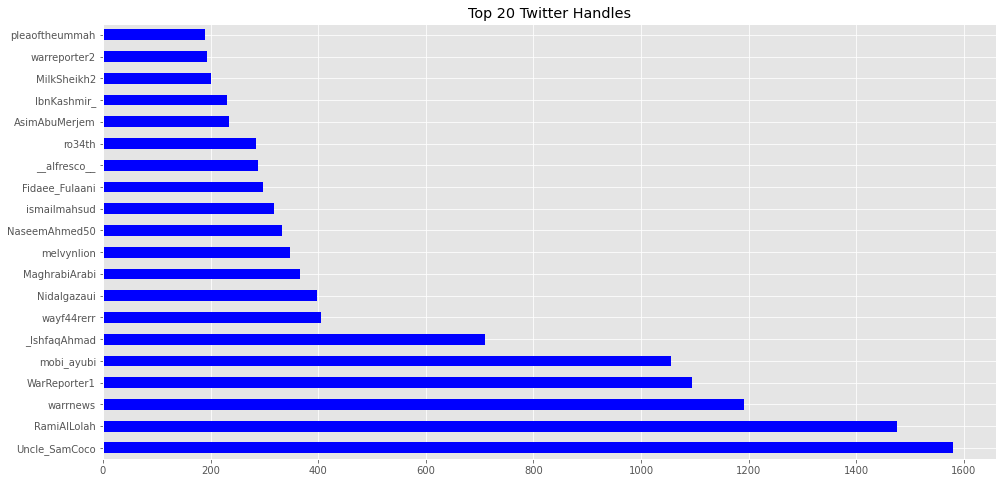

In [ ]:
top_handles = df.username.value_counts().sort_values(ascending=False)
top_handles.head(20).plot.barh(title='Top 20 Twitter Handles',
                               figsize=(16,8),color="blue")

<AxesSubplot:title={'center':'ISIS related tweets over time'}>

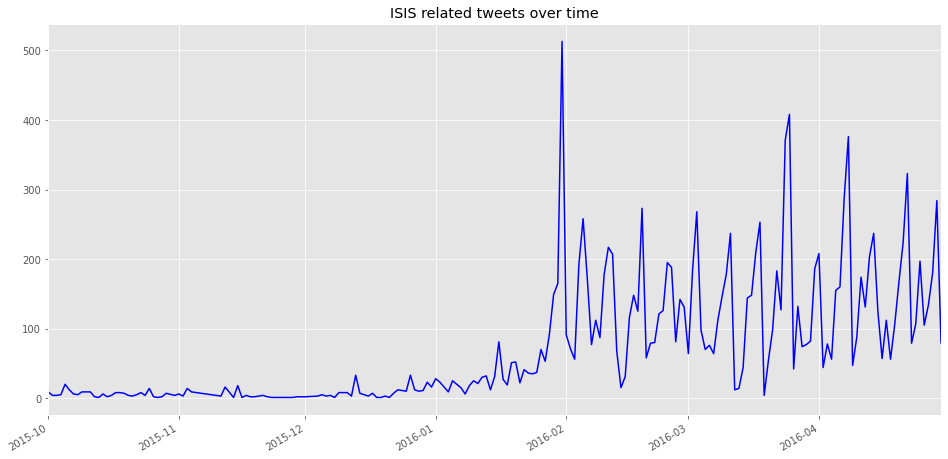

In [ ]:
df.time.value_counts().plot(title='ISIS related tweets over time',
                              xlim=[datetime.date(2015, 10, 1),datetime.date(2016, 4, 30)],
                              figsize=(16,8),color="blue")

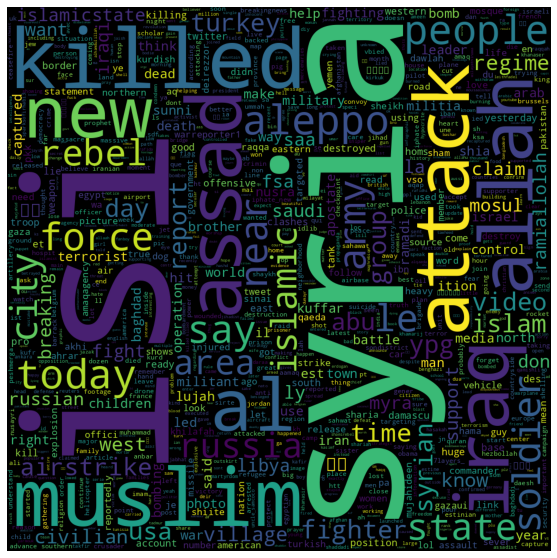

In [ ]:
junk = re.compile("al|RT|\n|&.*?;|http[s](?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+)*")
tweets = [junk.sub(" ", t) for t in df.tweets]

vec = TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_df=.5)
tfv = vec.fit_transform(tweets)

terms = vec.get_feature_names_out()
wc = WordCloud(height=1000, width=1000, max_words=1000).generate(" ".join(terms))

plt.figure(figsize=(10, 10))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [ ]:
df = pd.read_csv('tweets.csv', parse_dates=['time'],
                 infer_datetime_format=True, encoding="utf8")

hour_profiles = df.groupby('username').apply(lambda x: x.time.dt.hour.value_counts()) \
    .unstack().fillna(0)
hour_profiles.index = [w[0:40] for w in hour_profiles.index]
hour_profiles.columns = ["%04d" % (x * 100) for x in range(24)]
hour_profiles.iloc[:5,:5]

,0000,0100,0200,0300,0400
04_8_1437,6.0,0.0,0.0,0.0,3.0
06230550_IS,0.0,0.0,0.0,5.0,0.0
1515Ummah,0.0,0.0,0.0,0.0,0.0
1Dawlah_III,10.0,7.0,2.0,9.0,14.0
432Mryam,3.0,4.0,0.0,0.0,3.0


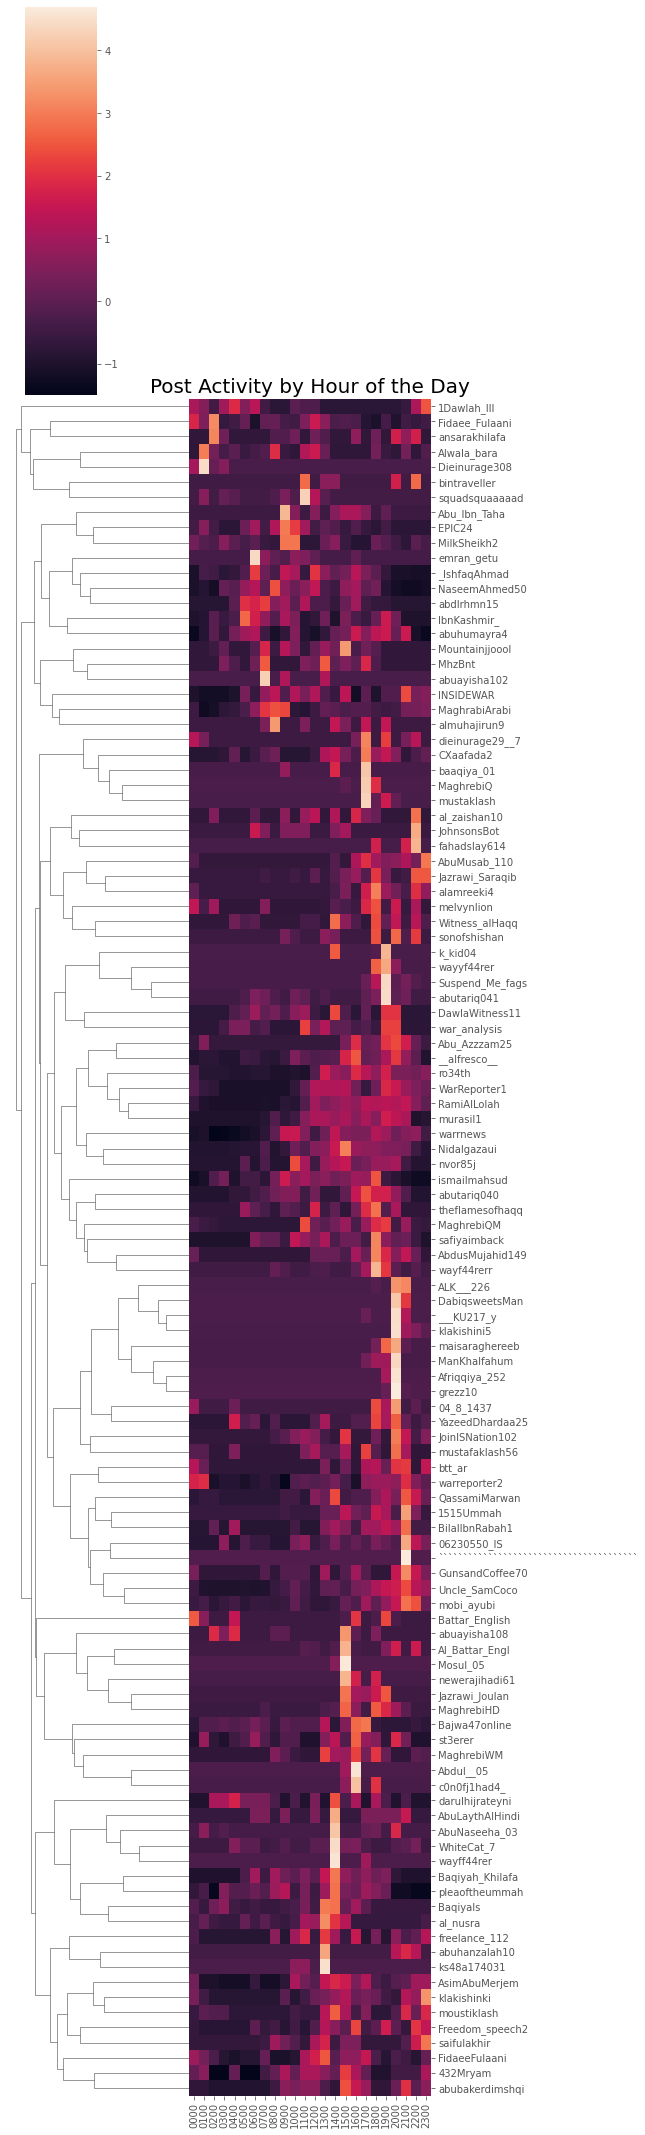

In [ ]:
g = sns.clustermap(hour_profiles, z_score=0,
                   col_cluster=False, row_cluster=True,
                   figsize=(20, 30))
wmult=.25
hmult=.75
hm_pos = g.ax_heatmap.get_position()
rd_pos = g.ax_row_dendrogram.get_position()
cd_pos = g.ax_col_dendrogram.get_position()
g.ax_heatmap.set_position([hm_pos.x0 - rd_pos.width * (1-hmult),
                           hm_pos.y0,
                           hm_pos.width * wmult,
                           hm_pos.height])
g.ax_row_dendrogram.set_position([rd_pos.x0,
                                  rd_pos.y0,
                                  rd_pos.width * hmult,
                                  rd_pos.height])
g.ax_col_dendrogram.set_position([cd_pos.x0 - rd_pos.width * (1-hmult),
                                  cd_pos.y0,
                                  cd_pos.width*wmult,
                                  cd_pos.height/2])
#g.cax.set_visible(False)
g.ax_heatmap.set_title("Post Activity by Hour of the Day", fontsize=20)
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), fontsize=10, rotation=0)
plt.setp(g.ax_heatmap.xaxis.get_majorticklabels(), fontsize=10, rotation=90)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

df['weekday'] = df.time.dt.dayofweek
df['hour'] = df.time.dt.hour
top50_users = df[df.username.isin(df.username.value_counts()[:50].keys().tolist())]
profile = top50_users.groupby('username').apply(lambda x: pd.crosstab(x.hour, x.weekday)).unstack().fillna(0)
profile = profile.applymap(lambda x: 1 if x > 0 else 0)
profile = pd.DataFrame(StandardScaler().fit_transform(profile), index=profile.index)
profile.iloc[10:14,10:14]

,10,11,12,13
username,,,,
CXaafada2,-0.592749,-0.561951,-0.623610,-0.717741
FidaeeFulaani,-0.592749,-0.561951,1.603567,-0.717741
Fidaee_Fulaani,1.687055,-0.561951,1.603567,1.393261
IbnKashmir_,-0.592749,-0.561951,-0.623610,-0.717741


In [ ]:
from scipy.spatial.distance import cosine

sims = np.dot(profile, profile.T)
square_mag = np.diag(sims)
inv_square_mag = 1 / square_mag
inv_square_mag[np.isinf(inv_square_mag)] = 0
inv_mag = np.sqrt(inv_square_mag)
cosine = sims * inv_mag
cossims = pd.DataFrame(sims * inv_mag, index=profile.index, columns=profile.index)
cossims.values[[np.arange(len(cossims))]*2] = 0

print(cossims['RamiAlLolah'].sort_values(ascending=False)[1:11])
print(cossims['RamiAlLolah'].sort_values(ascending=False)[-10:])

username
warrnews         10.516803
ro34th            7.004774
MaghrabiArabi     6.800758
AsimAbuMerjem     5.792573
Uncle_SamCoco     5.415480
mobi_ayubi        5.263684
warreporter2      3.932123
murasil1          3.419142
safiyaimback      3.119021
Nidalgazaui       3.020421
Name: RamiAlLolah, dtype: float64
username
IbnKashmir_       -4.028375
Alwala_bara       -4.034896
al_zaishan10      -4.402553
1Dawlah_III       -4.466880
AbuMusab_110      -4.561291
Al_Battar_Engl    -4.620941
WhiteCat_7        -4.692331
MaghrebiWM        -4.703870
Jazrawi_Saraqib   -4.731984
Battar_English    -4.999219
Name: RamiAlLolah, dtype: float64


<ipython-input-36-017787bf212d>:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cossims.values[[np.arange(len(cossims))]*2] = 0


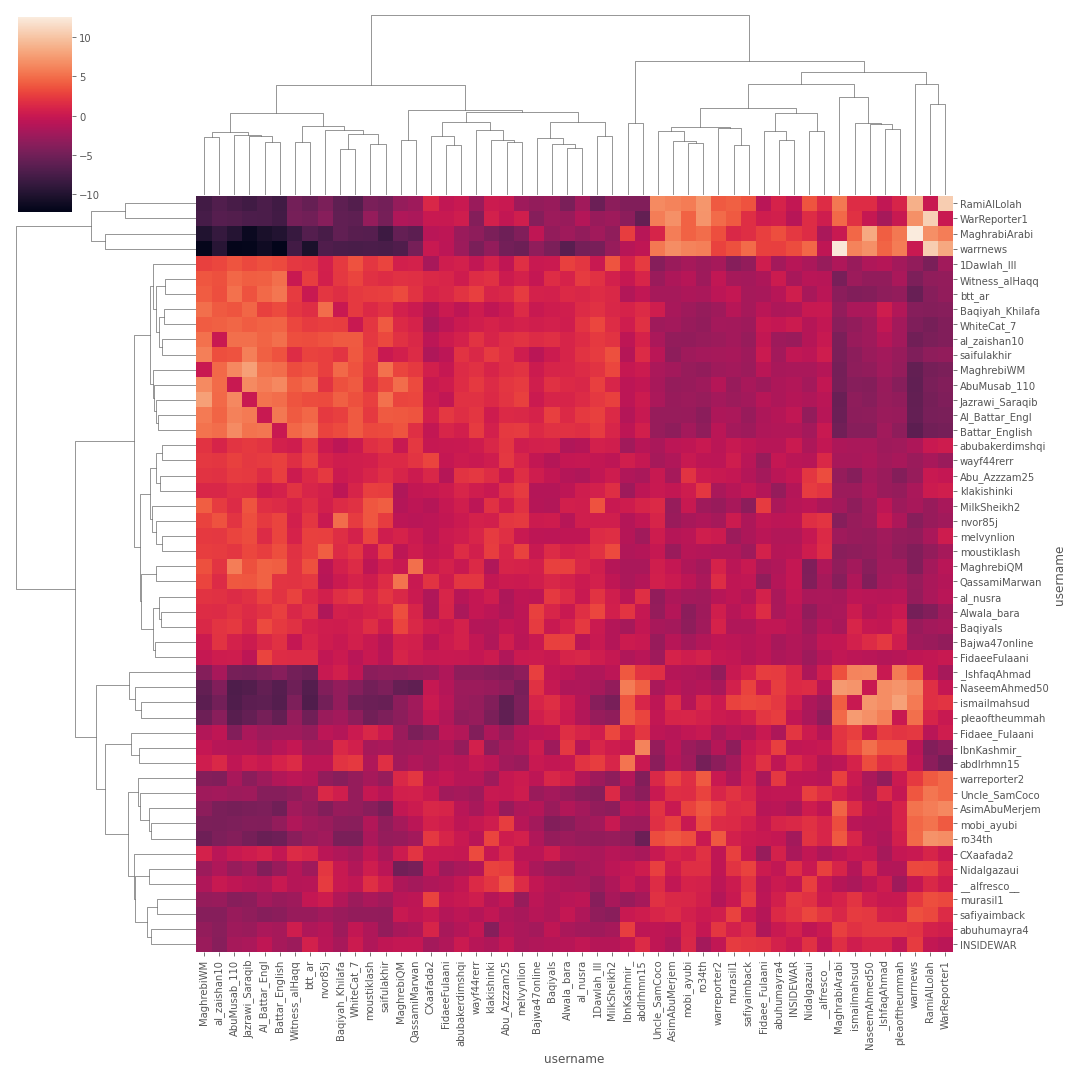

In [ ]:
g = sns.clustermap(cossims, figsize=(15, 15))
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), fontsize=10, rotation=0)
plt.setp(g.ax_heatmap.xaxis.get_majorticklabels(), fontsize=10, rotation=90)
plt.show()

starhood
large          6
mid           31
small         74
very large     1
Name: username, dtype: int64


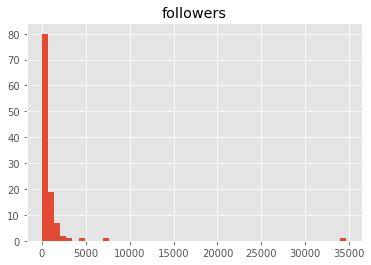

In [ ]:
summum_popularity = pd.DataFrame(df.groupby('username').followers.max())
summum_popularity.hist(bins=50)
small=500
mid=2000
big=10000
summum_popularity['starhood']='none'
summum_popularity.loc[summum_popularity.followers<small,'starhood']='small'
summum_popularity.loc[(summum_popularity.followers>small) & (summum_popularity.followers<mid),'starhood']='mid'
summum_popularity.loc[(summum_popularity.followers>mid) & (summum_popularity.followers<big),'starhood']='large'
summum_popularity.loc[(summum_popularity.followers>big),'starhood']='very large'
df.set_index('username', inplace=True)
df['starhood']=summum_popularity.starhood
df.reset_index(inplace=True)

print(df.groupby('starhood').username.unique().apply(lambda x: x.size))

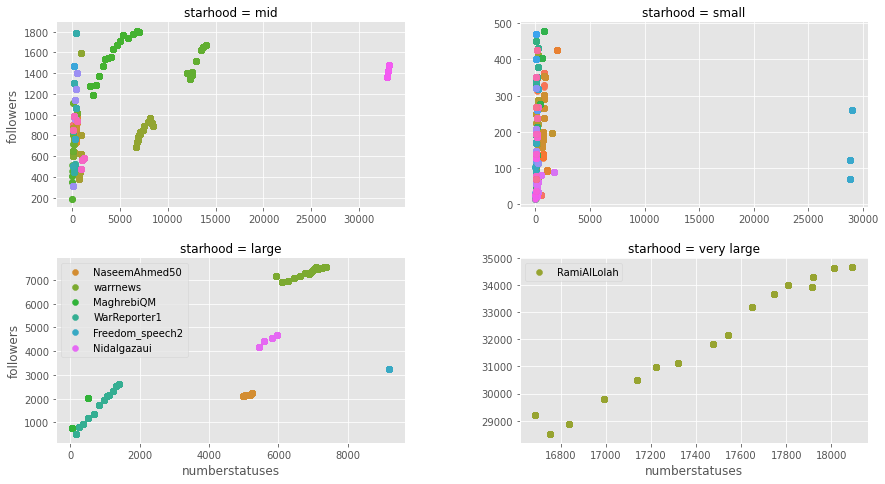

In [ ]:
df[df.starhood=='large'].groupby('name').username.last()

df[df.starhood=='large'].groupby('name').username.last()

grid = sns.FacetGrid(df, col='starhood',col_wrap=2, hue='username', sharex=False, sharey=False)
grid=grid.map(plt.scatter,'numberstatuses','followers')
grid.axes[2].legend(loc='upper left')
grid.axes[3].legend(loc='upper left')
grid.fig.set_size_inches((14,7))

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


<AxesSubplot:xlabel='time'>

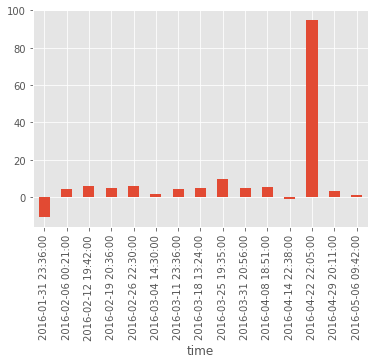

In [ ]:


rami_data = df[df.username=='RamiAlLolah']
pd.to_datetime(rami_data.time)
rami_data.time=pd.to_datetime(rami_data.time)
rami_data.set_index('time', inplace=True)
impact = ((rami_data.followers-rami_data.followers.shift(-1))/(rami_data.numberstatuses-rami_data.numberstatuses.shift(-1))).dropna()
impact.plot(kind='bar')

In [ ]:
df=shuffle(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17410 entries, 11956 to 13796
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   username        17410 non-null  object        
 1   name            17410 non-null  object        
 2   description     14728 non-null  object        
 3   location        11432 non-null  object        
 4   followers       17410 non-null  int64         
 5   numberstatuses  17410 non-null  int64         
 6   time            17410 non-null  datetime64[ns]
 7   tweets          17410 non-null  object        
 8   weekday         17410 non-null  int64         
 9   hour            17410 non-null  int64         
 10  starhood        17410 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 1.6+ MB


In [ ]:
df.head()

,username,name,description,location,followers,numberstatuses,time,tweets,weekday,hour,starhood
11956,warrnews,War BreakingNews,we provide fresh news from every battlefield,world,7528,7071,2016-04-10 21:57:00,Uzbek Jihadists Fights alongside #Rebels in #A...,6,21,large
16623,ro34th,one who believes,"Torah Observant, follower of the Prophet Yeshu...",dar al-kufr,1482,33091,2016-05-11 13:29:00,#AmaqAgency 3 children were murdered by #Russi...,2,13,mid
4325,Battar_English,PROPHET'S KHILĀFA,NaN,NaN,137,148,2016-02-13 00:38:00,"بسم الله الرحمن الرحيم\nIn the name of Allah, ...",5,0,small
5246,ismailmahsud,General,"Listen! No affiliations, Final year research o...",S.Wazirstan|Mahsud not a Wazir,626,883,2016-02-22 12:59:00,"@ismailmahsud also in Halab, ISIS has cut main...",0,12,mid
8915,thefIamesofhaqq,١٠Flames of Haqq,NaN,NaN,318,224,2016-03-22 17:27:00,@OmarKhattabHar1 @clashinglion you're welcome ...,1,17,small


In [ ]:
print(df.head())
df.drop(columns='username',inplace=True)
df.drop(columns='description',inplace=True)
df.drop(columns='location',inplace=True)
df.drop(columns='followers',inplace=True)
df.drop(columns='numberstatuses',inplace=True)
df.drop(columns='time',inplace=True)
df.drop(columns='weekday',inplace=True)
df.drop(columns='hour',inplace=True)
df.drop(columns='starhood',inplace=True)

df.head()

              username               name  \
11956         warrnews   War BreakingNews   
16623           ro34th   one who believes   
4325    Battar_English  PROPHET'S KHILĀFA   
5246      ismailmahsud            General   
8915   thefIamesofhaqq   ١٠Flames of Haqq   

                                             description  \
11956       we provide fresh news from every battlefield   
16623  Torah Observant, follower of the Prophet Yeshu...   
4325                                                 NaN   
5246   Listen! No affiliations, Final year research o...   
8915                                                 NaN   

                             location  followers  numberstatuses  \
11956                           world       7528            7071   
16623                     dar al-kufr       1482           33091   
4325                              NaN        137             148   
5246   S.Wazirstan|Mahsud not a Wazir        626             883   
8915                        

,name,tweets
11956,War BreakingNews,Uzbek Jihadists Fights alongside #Rebels in #A...
16623,one who believes,#AmaqAgency 3 children were murdered by #Russi...
4325,PROPHET'S KHILĀFA,"بسم الله الرحمن الرحيم\nIn the name of Allah, ..."
5246,General,"@ismailmahsud also in Halab, ISIS has cut main..."
8915,١٠Flames of Haqq,@OmarKhattabHar1 @clashinglion you're welcome ...


In [ ]:
df.describe()

,name,tweets
count,17410,17410
unique,112,17410
top,Rami,Uzbek Jihadists Fights alongside #Rebels in #A...
freq,1475,1


In [ ]:
df.tweets[0]

"ENGLISH TRANSLATION: 'A MESSAGE TO THE TRUTHFUL IN SYRIA - SHEIKH ABU MUHAMMED AL MAQDISI: http://t.co/73xFszsjvr http://t.co/x8BZcscXzq"

In [ ]:
df = df.apply(lambda x: x.astype(str).str.lower())
df.head()

,name,tweets
11956,war breakingnews,uzbek jihadists fights alongside #rebels in #a...
16623,one who believes,#amaqagency 3 children were murdered by #russi...
4325,prophet's khilāfa,"بسم الله الرحمن الرحيم\nin the name of allah, ..."
5246,general,"@ismailmahsud also in halab, isis has cut main..."
8915,١٠flames of haqq,@omarkhattabhar1 @clashinglion you're welcome ...


In [ ]:
df.name.unique()

array(['war breakingnews', 'one who believes', "prophet's khilāfa",
       'general', '١٠flames of haqq', 'al-nusra', '☝️', 'hafnium fulaani',
       'rain qattal', 'umm abdul-majeed', 'salahuddin ayubi',
       'conflict reporter', 'maghrabi arabie', 's.o.dawlah',
       'ibni haneefah', 'rami', 'mohamed naseem', 'الولاء البراء',
       'is_baqiya', 'kuffar hunter 1', 'plea of the ummah!',
       'asim abu merjem', 'كتكات كوكونت', 'the witnesser', 'war analysis',
       'ibn kashmir', 'mountain man', 'ansar al-khilafah', 'ibn rawaha',
       'mustafa al iraqi', 'ابن سالار', 'gunsandcoffee', 'maghrebi',
       'the caravan', 'abu musab al-amreeki', 'shaaheen',
       'join is nation', 'wayf44rer', 'musa al-ansari', 'n i d a l',
       'war reporter', 'راعي البقر جوز الهند', 'ابو الدرداء #خلافة',
       'btt_ar', 'melvyn', 'maisara al-ghereeb', 'الهنود الحمر كوكونة',
       'milk sheikh', 'mustafa ai lraqi', 'al-battar english',
       'كتكات كوكونة', 'أبو أسامة الصومالي', 'dawla witnes

In [ ]:
df.isnull().any()

name      False
tweets    False
dtype: bool

In [ ]:
df[df.tweets.duplicated()].count()

name      0
tweets    0
dtype: int64

In [ ]:
for tweets in df.tweets[0:10]:
    print(tweets)

uzbek jihadists fights alongside #rebels in #aleppo against ypg in sheikh maqsood district https://t.co/p2hbwhojvy
#amaqagency 3 children were murdered by #russia|n pilots yesterday in #raqqah city https://t.co/zxwevevfut
بسم الله الرحمن الرحيم
in the name of allah, the most gracious, the most merciful...
friday february 12, 16 ad
3rd jamadi ul awwal 1437 a.h
@ismailmahsud also in halab, isis has cut main supply lines of regime forces at three points. surprising an pretty mind blowing
@omarkhattabhar1 @clashinglion you're welcome brother.

thanks as well to our brother @eplc24
i won 500 coins on @8ballpool! see how much you can win! https://t.co/ov3dcgiwkz
@pappii5 you doesn't have to understand you this drunken fellow...you're drunk go to sleep
rt @qassami_marwan: too many important developments, expect a new speech by isis spokesman al adnani soon.
rt @malle111elf: #pt russian fighter jet accidentally struck a gathering of syrian troops in al-barida.. #saa
#islamicstate https://t.co/

In [ ]:
df['tweets']=df.tweets.str.replace(r'http[s]?:(?:[a-zA-Z]|[0-9]|[$-_@.& +]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','',regex=True)
df['tweets']=df.tweets.str.replace(r'\@\w*\b','',regex=True)
df['tweets']=df.tweets.str.replace(r'\#\w*\b','',regex=True)
df['tweets']=df.tweets.str.replace(r'\b\d+','',regex=True)
df['tweets']=df.tweets.str.replace(r'\W*\b\w{1,2}\b','',regex=True)
df['tweets']=df['tweets'].str.findall('\w{2,}').str.join(' ')

In [ ]:
for tweets in df.tweets[0:5]:
    print(tweets)

uzbek jihadists fights alongside against ypg sheikh maqsood district
children were murdered pilots yesterday city
بسم الله الرحمن الرحيم the name allah the most gracious the most merciful friday february jamadi awwal
also halab isis has cut main supply lines regime forces three points surprising pretty mind blowing
you welcome brother thanks well our brother


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words = stopwords.words('english')    
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
df['tweets'] = df['tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
print("Minimum kelime sayısı ..:" ,df['tweets'].str.split().str.len().min())
print("Maximum kelime sayısı ..:" ,df['tweets'].str.split().str.len().max())
print("Maximum kelime sayısı ..:" ,df['tweets'].str.split().str.len().mean())
df[df['tweets'].str.split().str.len()<3]


Minimum kelime sayısı ..: 0
Maximum kelime sayısı ..: 24
Maximum kelime sayısı ..: 7.923721998851235


,name,tweets
10823,umm abdul-majeed,
1529,الولاء البراء,iyyaki uhkti
149,is_baqiya,hīs
255,kuffar hunter 1,idont care
9867,ibn kashmir,shootout
...,...,...
7376,milk sheikh,yes
8289,it man,back march
8647,maghrabi arabie,answer
2448,obi-wan al coconuty,monde


In [ ]:
df[df['tweets'].str.split().str.len()<3].count()

name      2058
tweets    2058
dtype: int64

In [ ]:
df.drop(df[df['tweets'].str.split().str.len()<3].index,inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
df.name.value_counts()

rami                    1372
conflict reporter       1078
war breakingnews        1040
salahuddin ayubi        1017
ibni haneefah            638
                        ... 
khilafah superstate        6
ibn al-shishani            5
newerajihadi61             3
fahad slyman alsomal       2
abdul05                    1
Name: name, Length: 112, dtype: int64

In [ ]:
def preprocess_tweet_text(tweet):
    
    
    # to convert all the characters of the tweet into lower case alphabets
    tweet.lower()
    
    # Remove urls from the tweets
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    
    # Remove user related references from the tweets:: '@' and '#' 
    tweet = re.sub(r'\@\w+|\#','', tweet)
    
    # Remove punctuations from the tweets
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    
    # Remove stopwords from the tweets
    tweet_tokens = word_tokenize(tweet)
    filtered_words = [w for w in tweet_tokens if not w in stop_words]
    joined_text = " ".join(filtered_words)
    
    return joined_text

In [ ]:
def get_feature_vector(train_fit):
   
    
    vector = TfidfVectorizer(sublinear_tf=True)      # Defining the vector
    vector.fit(train_fit)                            # fitting the data into the vector
    return vector 

In [ ]:
tweets=df['tweets']

In [ ]:
processed_text = tweets.apply(preprocess_tweet_text)

print("Processed text :: \n\n", processed_text)

Processed text :: 

 0        uzbek jihadists fights alongside ypg sheikh ma...
1                  children murdered pilots yesterday city
2        بسم الله الرحمن الرحيم name allah gracious mer...
3        also halab isis cut main supply lines regime f...
4                      welcome brother thanks well brother
                               ...                        
15347    interesting note using coloring scheme saddam ...
15348                        muslim loves hates sake allah
15349    seeks unsc resolution threatens consequences p...
15350    province today another heavy regime artillery ...
15351    release video assad plane destroyed isis dakwa...
Name: tweets, Length: 15352, dtype: object


In [ ]:
stemmer = PorterStemmer()

stemmed_words = [stemmer.stem(i) for i in processed_text]

In [ ]:
lemmatizer = WordNetLemmatizer()
lemma_words = [lemmatizer.lemmatize(w, pos='a') for w in stemmed_words]

In [ ]:
tf_vector = get_feature_vector(np.array(tweets).ravel())

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

# Load the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Define a function to compute the sentiment score for each tweet
def get_sentiment_score(text):
    sentiment_score = sia.polarity_scores(text)
    return sentiment_score

# Apply the sentiment analysis function to each tweet in the DataFrame
df['sentiment_score'] = tweets.apply(get_sentiment_score)

# Extract the compound sentiment score from each sentiment_score dictionary
df['sentiment'] = df['sentiment_score'].apply(lambda x: 'Positive' if x['compound'] >= 0.05 else ('Negative' if x['compound'] <= -0.05 else 'Neutral'))



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
df.head()

,name,tweets,sentiment_score,sentiment
0,war breakingnews,uzbek jihadists fights alongside ypg sheikh ma...,"{'neg': 0.278, 'neu': 0.722, 'pos': 0.0, 'comp...",Negative
1,one who believes,children murdered pilots yesterday city,"{'neg': 0.524, 'neu': 0.476, 'pos': 0.0, 'comp...",Negative
2,prophet's khilāfa,بسم الله الرحمن الرحيم name allah gracious mer...,"{'neg': 0.0, 'neu': 0.753, 'pos': 0.247, 'comp...",Positive
3,general,also halab isis cut main supply lines regime f...,"{'neg': 0.108, 'neu': 0.619, 'pos': 0.273, 'co...",Positive
4,١٠flames of haqq,welcome brother thanks well brother,"{'neg': 0.0, 'neu': 0.2, 'pos': 0.8, 'compound...",Positive


In [ ]:
X = tf_vector.transform(np.array(tweets).ravel())     # Predictor Variable
y = np.array(df["sentiment"]).ravel()  

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [ ]:
NB_model = MultinomialNB()

NB_model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_predict_nb = NB_model.predict(X_test)

print("Accuracy Score for Naive Bayes Model is :: ", accuracy_score(y_test, y_predict_nb))

Accuracy Score for Naive Bayes Model is ::  0.6326929338977532


In [ ]:
LR_model = LogisticRegression(solver='lbfgs')
LR_model.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
ypred = LR_model.predict(X_test)

print("Accuracy Score for Logistic Regression Model is :: ",accuracy_score(y_test, y_predict_lr))

Accuracy Score for Logistic Regression Model is ::  0.8218821230869424


In [ ]:
from sklearn import metrics

In [ ]:
macro_averaged_precision = metrics.precision_score(y_test, ypred, average = 'macro')
print(f"Macro-Averaged Precision score using sklearn library : {macro_averaged_precision}")

Macro-Averaged Precision score using sklearn library : 0.8237768459432684


In [ ]:
macro_averaged_recall = metrics.recall_score(y_test, ypred, average = 'macro')
print(f"Macro-averaged recall score using sklearn : {macro_averaged_recall}")

Macro-averaged recall score using sklearn : 0.7969876396087715


In [ ]:
macro_averaged_f1 = metrics.f1_score(y_test, ypred, average = 'macro')
print(f"Macro-Averaged F1 score using sklearn library : {macro_averaged_f1}")

Macro-Averaged F1 score using sklearn library : 0.8032526045224325


In [ ]:
macro_averaged_precision = metrics.precision_score(y_test, ypred, average = 'macro')
print(f"Macro-Averaged Precision score using sklearn library : {macro_averaged_precision}")

Macro-Averaged Precision score using sklearn library : 0.8237768459432684


In [ ]:
macro_averaged_recall = metrics.recall_score(y_test, ypred, average = 'macro')
print(f"Macro-averaged recall score using sklearn : {macro_averaged_recall}")

Macro-averaged recall score using sklearn : 0.7969876396087715


In [ ]:
macro_averaged_f1 = metrics.f1_score(y_test, ypred, average = 'macro')
print(f"Macro-Averaged F1 score using sklearn library : {macro_averaged_f1}")

Macro-Averaged F1 score using sklearn library : 0.8032526045224325


In [ ]:
pred_sentiment = pd.DataFrame({'tweet_id': X_test, 'sentiment':ypred})
pred_sentiment 

,tweet_id,sentiment
0,"(0, 17187)\t0.29609789243486573\n (0, 12778...",Negative
1,"(0, 17109)\t0.27094978216150484\n (0, 15116...",Neutral
2,"(0, 16972)\t0.2954729911641539\n (0, 16668)...",Positive
3,"(0, 16596)\t0.46873425194597934\n (0, 16433...",Positive
4,"(0, 15676)\t0.3486688901029084\n (0, 11333)...",Positive
...,...,...
3066,"(0, 16799)\t0.4849982312476831\n (0, 7052)\...",Positive
3067,"(0, 12769)\t0.377245749146936\n (0, 11060)\...",Negative
3068,"(0, 14660)\t0.20877162273745653\n (0, 14403...",Negative
3069,"(0, 15782)\t0.441372979769329\n (0, 14427)\...",Neutral


In [ ]:
results = pred_sentiment ['sentiment'].value_counts()
results

Negative    1321
Neutral     1224
Positive     526
Name: sentiment, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

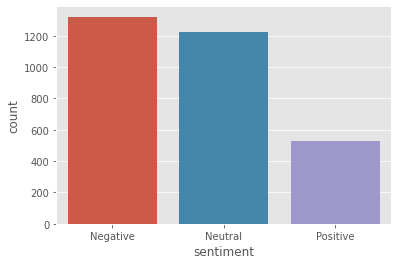

In [ ]:
import seaborn as sns
sns.countplot(pred_sentiment['sentiment'])